In [2]:
import pandas as pd
heart_disease = pd.read_csv("../datasets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# features matrix
x = heart_disease.drop("target", axis=1)

# labels
y = heart_disease["target"]

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
# fit model to train data
clf.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
# make prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [8]:
y_test

159    1
121    1
91     1
235    0
203    0
      ..
113    1
216    0
162    1
222    0
137    1
Name: target, Length: 61, dtype: int64

In [9]:
# evaluate
clf.score(x_train,y_train)

1.0

In [10]:
clf.score(x_test,y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 4, 30]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [14]:
# improve the model
# try diff n_estimators
import numpy as np
np.random.seed(42)

for i in range(10,100,10):
    print(f"**Trying model with {i} estimators**")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) * 100:.2f}%")
    print()

**Trying model with 10 estimators**
Model accuracy on test set: 78.69%

**Trying model with 20 estimators**
Model accuracy on test set: 78.69%

**Trying model with 30 estimators**
Model accuracy on test set: 75.41%

**Trying model with 40 estimators**
Model accuracy on test set: 77.05%

**Trying model with 50 estimators**
Model accuracy on test set: 80.33%

**Trying model with 60 estimators**
Model accuracy on test set: 78.69%

**Trying model with 70 estimators**
Model accuracy on test set: 78.69%

**Trying model with 80 estimators**
Model accuracy on test set: 80.33%

**Trying model with 90 estimators**
Model accuracy on test set: 78.69%



In [15]:
# save the models and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.7868852459016393

# Clean and Transform Data

### 1.1 Make sure it is all numerical

In [17]:
car_sales = pd.read_csv("../datasets/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [18]:
len(car_sales)

1000

In [19]:
# split data
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [21]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [22]:
dummies = pd.get_dummies(car_sales[categorical_features])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [23]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values 
- Fill them with some value
- Remove the samples with missing data altogether

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
car_sales_missing = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


### Using Pandas to tackle missing values

In [27]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [28]:

car_sales_missing["Make"].fillna("missing",inplace=True)

car_sales_missing["Colour"].fillna("missing",inplace=True)

car_sales_missing["Odometer (KM)"].fillna("missing",inplace=True)

car_sales_missing["Doors"].fillna(4,inplace=True)

In [29]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [30]:
# remove rows with missing Price
car_sales_missing.dropna(inplace=True)

In [31]:
len(car_sales_missing)

950

In [32]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [33]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Fill missing values with Scikit-learn

In [35]:
car_sales_missing = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# remove rows with missing Price
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [39]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# FILL CATEGORICAL VALUES WITH "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define features
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer 
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])


# Transform the data
filled_x = imputer.fit_transform(x)
filled_x



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [41]:
car_missing_filled = pd.DataFrame(
    filled_x,
    columns=["Make", "Colour", "Doors", "Odometer (KM)"]
)
car_missing_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [42]:
# process strings to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# define features
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

# transform the data
transformed_x = transformer.fit_transform(car_missing_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [43]:
# train and fit the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# split data:: use seed to get same results
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

# 
model.score(x_test, y_test)

0.21990196728583944

# Choosing the right estimator/algorithm for our Problem
- Classification :- predicting where a sample is A or B
- Regression :- predicting a number

In [44]:
# import Boston housing datasets
boston = pd.read_csv("../datasets/BostonHousing.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [45]:
len(boston)

506

In [46]:
# let's try Ridge model
from sklearn.linear_model import Ridge

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = Ridge()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.6662221670168522

#### Improve the model


In [47]:
# try random forest from ensemble
# let's try Ridge model
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.8654448653350507

# chossing estimators for classsification problems



In [48]:
heart_disease = pd.read_csv("../datasets/heart-disease.csv")

heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
len(heart_disease)

303

In [50]:
# using linear svc from the map
from sklearn.svm import LinearSVC

# set random seed
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = LinearSVC()
clf.fit(x_train, y_train)


# evaluate the linearSVC
clf.score(x_test,y_test)

0.7868852459016393

In [51]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier

# set random seed
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the linearSVC
clf.score(x_test,y_test)

0.7704918032786885

#### Note:
- If data is structured, use ensemble methods
- If datais unstructured, use deep learning or transfer learning

## Fitting Model and Using it to make Predictions


In [52]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier

# set random seed
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the linearSVC
clf.score(x_test,y_test)

0.7704918032786885

In [53]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Making predictions
- use predict()
- use predict_prob()

In [55]:
# use predict
y_pred = clf.predict(x_test)
y_pred        # prediction

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [56]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3


In [57]:
np.array(y_test)    # truth

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

#### using numpy to compare

In [58]:
# c ompare pred to truth lables
np.mean(y_pred == y_test)           # same as model.score()

0.7704918032786885

#### using sklearn metrics to compare

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7704918032786885

### using predict_proba()
- return probabilities


In [60]:
clf.predict_proba(x_test[:5])

array([[0.08      , 0.92      ],
       [0.91333333, 0.08666667],
       [0.06      , 0.94      ],
       [0.81333333, 0.18666667],
       [0.24      , 0.76      ]])

In [61]:
clf.predict(x_test[:5])

array([1, 0, 1, 0, 1], dtype=int64)

## Regrssion Prediction

In [62]:
# try random forest from ensemble
# let's try Ridge model
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.8654448653350507

In [63]:
y_preds = model.predict(x_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [64]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

### Evaluating a Machine Learning Model
- Estimator `score` method
- The `scoring` parameter
- Problem-specificmetric function

### --> for classification

In [66]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier

# set random seed
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the model
# using extimator score
clf.score(x_test,y_test)

0.8688524590163934

### --> for Regresion

In [67]:
# try random forest from ensemble
# let's try Ridge model
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.8654448653350507

#### evaluating the scoring parameter

### --> for classification

In [68]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# set random seed
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the model
# using extimator score
clf.score(x_test,y_test)

0.8688524590163934

In [69]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.90163934, 0.75409836, 0.8       , 0.75      ])

In [70]:
np.random.seed(42)
clf_single_score = clf.score(x_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))        # default sccoring parameter = mean_accuracy

# compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8347540983606558)

#### scoring parameters
- Accuracy
- Area under ROC curve
- Confusion matrix
- Classification report

#### --> accuracy


In [71]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# set random seed
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# can max_iter
clf = RandomForestClassifier(n_estimators=150)

cv_score = cross_val_score(clf, x, y, cv=5) 

In [72]:
np.mean(cv_score)

0.8347540983606558

In [73]:
print(f"Heart Disease Classifier Cross-Validation:: Accuracy --> { np.mean(cv_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validation:: Accuracy --> 83.48%


#### ---> Area Under Curve (AUC) / Area Under Receiver Operating Characteristic Curve(ROC)

***True Positive Rates against False Positive rate***

* True Positive = model predicts 1 when trith is 1
* False Pasitive =  model predicts 1 whwn truth is 0
* True Negative = model presics 0 when truth is 0
* False Negative = model predicts 0 when truth is 1


In [74]:
from sklearn.metrics import roc_curve

np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.87333333, 0.12666667],
        [0.43333333, 0.56666667],
        [0.41333333, 0.58666667],
        [0.86666667, 0.13333333],
        [0.17333333, 0.82666667],
        [0.14666667, 0.85333333],
        [0.37333333, 0.62666667],
        [0.96      , 0.04      ],
        [0.99333333, 0.00666667],
        [0.46      , 0.54      ]]),
 61)

In [75]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.12666667, 0.56666667, 0.58666667, 0.13333333, 0.82666667,
       0.85333333, 0.62666667, 0.04      , 0.00666667, 0.54      ])

In [76]:
# cal fpr, tpr, treshohlds

fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

In [77]:
# fals postives
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.10344828, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.20689655, 0.20689655, 0.27586207, 0.34482759,
       0.4137931 , 0.48275862, 0.5862069 , 0.65517241, 0.68965517,
       0.79310345, 0.93103448, 1.        ])

In [78]:
tpr

array([0.     , 0.03125, 0.1875 , 0.25   , 0.40625, 0.40625, 0.6875 ,
       0.6875 , 0.71875, 0.75   , 0.75   , 0.78125, 0.78125, 0.8125 ,
       0.875  , 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ])

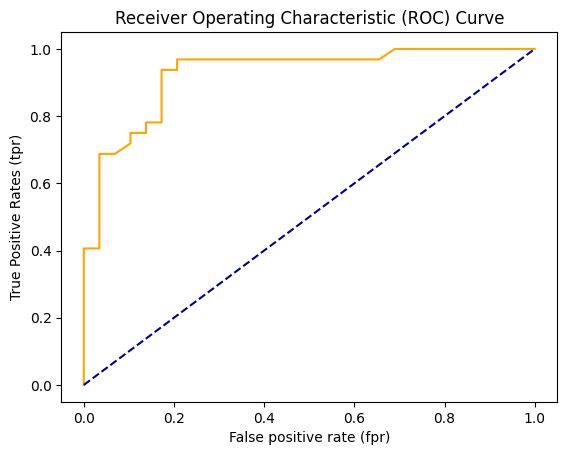

In [79]:
# a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of model
    """

    # plot roc_curve
    plt.plot(fpr,tpr, color="orange", label="ROC")

    # plot a line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True Positive Rates (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.show()

plot_roc_curve(fpr,tpr)

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9256465517241379

#### perfect auc score

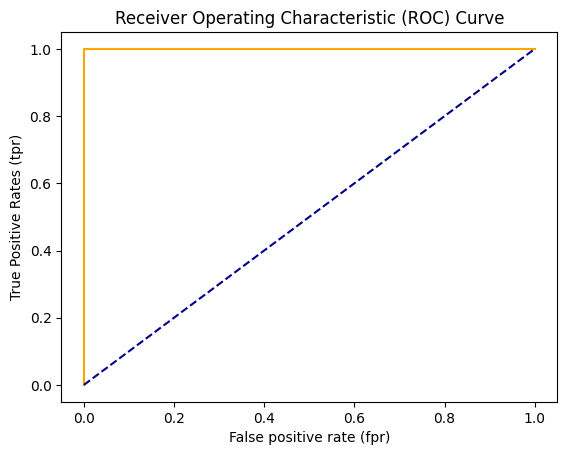

In [81]:
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [82]:
roc_auc_score(y_test, y_test)

1.0

#### ---> Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [84]:
# vosualizing conf_matrix with pd.crosstab()

pd.crosstab(
    y_test, y_preds,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


<Axes: >

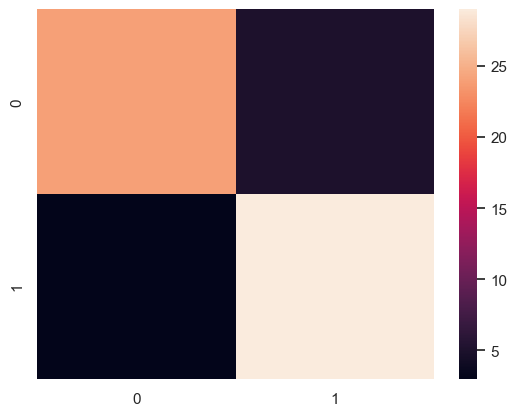

In [85]:
# using seaborn to visualize conf_matrix
import seaborn as sns
sns.set(font_scale=1)

# craete conf_matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot the matrix
sns.heatmap(conf_mat)

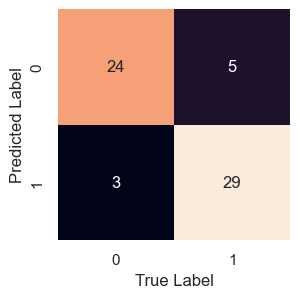

In [86]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat)

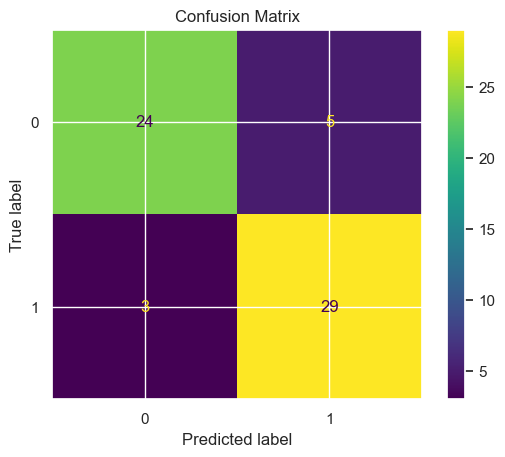

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
plt.title("Confusion Matrix")
plt.show()

#### ---> Classification Report

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Evalution of Refression Models
- r-squared
- Mean Absolute Error
- Mean Squared Error

In [91]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = boston.drop("medv", axis=1)
y = boston["medv"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)


RandomForestRegressor()

In [92]:
model.score(x_test, y_test)     # r-squraed

0.8654448653350507

In [94]:
from sklearn.metrics import r2_score

# fill an array with y_test_mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()

21.488235294117644

In [95]:
r2_score(y_test, y_test_mean)

0.0

##### ---> Mean Absolute Error

In [96]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)

mae

2.136382352941176

In [97]:
df = pd.DataFrame(data={"actual_values": y_test, "predicted_values": y_preds})
df["differences"] = df["predicted_values"] - df["actual_values"]
df

,actual_values,predicted_values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


#### ---> Mean Squraed Error

In [98]:
from sklearn.metrics import mean_squared_error

msc = mean_squared_error(y_test, y_preds)
msc

9.867437068627442

In [99]:
# calculate msc by hand
squared = np.square(df["differences"])
squared.mean()



9.867437068627442

#### uSING A SCORING PARAMETER

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)


In [101]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [102]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [109]:
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision, np.mean(cv_precision)

(array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789]),
 0.8329547346025924)

In [108]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy") # default
cv_acc, np.mean(cv_acc) * 100

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 82.48087431693989)

In [110]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1") 
cv_f1, np.mean(cv_f1)

(array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141]),
 0.8426854603423344)

In [111]:
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")   # same as sensitivity
cv_recall, np.mean(cv_recall)

(array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788]),
 0.8545454545454545)

#### regression models

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston.drop("medv", axis=1)
y = boston["medv"]

model = RandomForestRegressor(n_estimators=100)


In [114]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [115]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring="r2")
cv_r2, np.mean(cv_r2)

(array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]),
 0.6243870737930857)

cv_mae = cross_val_score(model, x,y,cv=5, scoring="mae")

In [116]:
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae, np.mean(cv_mae)

(array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861]),
 -3.003222869345758)

In [117]:
cv_msc = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
cv_msc, np.mean(cv_msc)

(array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
        -19.48161818]),
 -21.12863512415064)

### Metric Functions

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

# evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds) * 100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds) * 100:.2f}%")


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


##### Regresion methods


In [119]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston.drop("medv", axis=1)
y = boston["medv"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

# evaluate the classifier
print("Regression metrics on the test set")
print(f"R2: {r2_score(y_test, y_preds) * 100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSC: {mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R2: 86.54%
MAE: 2.136382352941176
MSC: 9.867437068627442


#### Improving a model
- First prediction = baseline prediction
- First model = baseline model

##### ---> Ways to improve
- Data Perspective:
    - Can we get more data
    - Can we improve the data

- From model Perspective:
    - Is there a better model to use
    - Can we improve the current model

#### Ways to Adjust Hyperparameters
- By hand
- Randomly with RandomSearchCV
- Exhaustively with GridSearchCV


In [120]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning HyperParameters By Hand

In [121]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels
    on a classification model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict

In [125]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

# features and target
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split data into train, validation and test
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

# train data
x_train, y_train = x[:train_split], y[:train_split]
# validation data
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
# tets data
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()

# train the model
clf.fit(x_train, y_train)

# make baseline predictions
y_preds = clf.predict(x_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)  # helper function

baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [123]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [126]:
np.random.seed(42)

# create a 2nd classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

clf_2_metrics


Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [129]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(x_train, y_train)

y_preds_3 = clf_3.predict(x_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

clf_3_metrics

Accuracy: 80.00%
Precision: 0.81
Recall: 0.84
F1: 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

In [138]:
np.random.seed(42)
clf_4 = RandomForestClassifier(n_estimators=100, min_samples_split=20, min_samples_leaf=10)
clf_4.fit(x_train, y_train)

y_preds_4 = clf_4.predict(x_valid)

clf_4_metrics = evaluate_preds(y_valid, y_preds_4)

clf_4_metrics

Accuracy: 84.44%
Precision: 0.82
Recall: 0.92
F1: 0.87


{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.92, 'f1': 0.87}

In [133]:
np.random.seed(42)
clf_5 = RandomForestClassifier(n_estimators=100, min_samples_leaf=10)

clf_5.fit(x_train, y_train)

y_preds_5 = clf_5.predict(x_valid)

clf_5_metrics = evaluate_preds(y_valid, y_preds_5)

clf_5_metrics

Accuracy: 84.44%
Precision: 0.82
Recall: 0.92
F1: 0.87


{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.92, 'f1': 0.87}

In [142]:
#### Using RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=100, cv=5, verbose=2
)

rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [143]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [144]:
# make predictions wit best pyperparameters
rs_y_preds = rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

rs_metrics

Accuracy: 81.97%
Precision: 0.76
Recall: 0.89
F1: 0.82


{'accuracy': 0.82, 'precision': 0.76, 'recall': 0.89, 'f1': 0.82}

In [147]:
# using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

grid_2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

np.random.seed(42)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5, verbose=2
)

gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [148]:
gs_clf.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [149]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

gs_metrics

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

<Axes: >

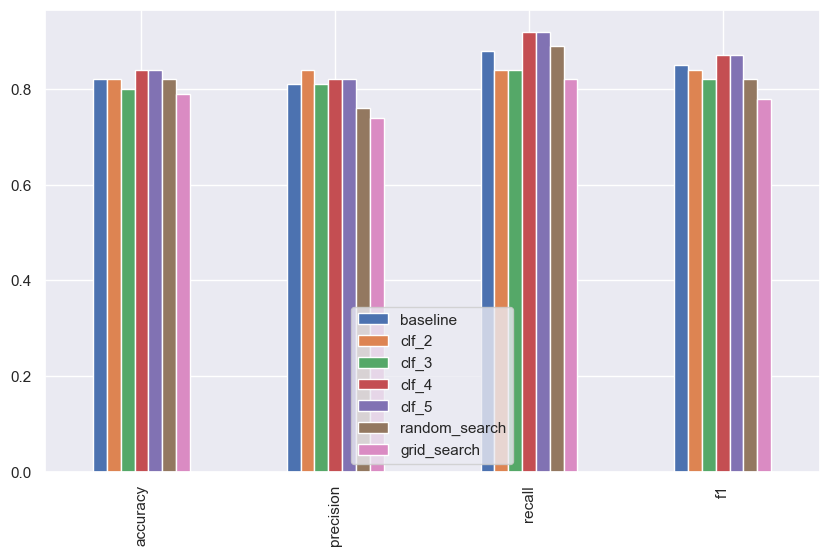

In [150]:
# compare all metrics
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": clf_2_metrics,
    "clf_3": clf_3_metrics,
    "clf_4": clf_4_metrics,
    "clf_5": clf_5_metrics,
    "random_search": rs_metrics,
    "grid_search": gs_metrics
})

compare_metrics.plot.bar(figsize=(10,6))

## Save and Train the models
- with Pythons's `pickle` library
- with Python's `joblib` library

In [151]:
import pickle 

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [152]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

# make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)

evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [153]:
import joblib

# save model
joblib.dump(gs_clf, "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [154]:
# load model
loaded_joblib_model = joblib.load("gs_random_forest_model_1.joblib")

# make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Putting it all together

In [155]:
data = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [156]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [157]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

- Fill missing data
- Convert data to numbers
- Build a model on the data

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
np.random.seed(42)

# drop rows with missing Price
data = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")

# drop rows with missing Price
data.dropna(subset=["Price"], inplace=True)

# define categorical features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

# setup preprocessing steps (fill missing values and convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ]
)

# create a preprocessing and modelling pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# split data
x = data.drop("Price", axis=1)
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

In [170]:
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt","log2"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
 
gs_model.fit(x_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.
